# **Introduction:**

* Often a dataset will have a few points that will be beyond limits or you can say which are extreme. For example, all points of a feature are between 10-100 but some points are on 5000 etc. Such points are called outliers.

* Its better to simply remove these points from the dataset to better generalize the features and datasets.

* Many statistical models assume that the data follow a certain distribution or have specific properties. Outliers can violate these assumptions, leading to inaccurate inferences and predictions.

* Outliers can arise due to data entry errors, measurement errors, or rare events. They may not reflect the true nature of the phenomenon being studied. Removing outliers helps in improving data quality.

* Just remember, if your dataset have a very large percentage of outliers then may be your data is having wide distribution. Thats not outliers.



# **Methods of Identifying Outliers:**

The very first thing is to decide the limit of each feature. Of course only after that, we will be able to check which are outliers or not.

We can decide the limit of each feature using any of the following method:

1. By calculating Inter Quartile Range (IQR) e.g. Boxplot
2. By calculating Standard Deviation (S.D.): E.g. everything above 3S.D will be an outlier.
3. By Visualizing or Domain Limit value e.g. scatterplot
  
  (Domain limit value means decide what will the maximum value of that feature. Anything above that will be considered as outlier.)

Keep in mind, no methodology will tell you 100% correct outliers.


## **1. Using Interquartile Range(IQR):**

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
# Function that will craete a random distribution of ages

def create_ages(mu = 50, sigma = 13, num_samples = 100): # mu = mean of ages, sigma: S.D of ages, num_samples = number of ages to produce by this method
  sample_ages = np.random.normal(loc = mu, scale = sigma, size = num_samples)
  sample_ages = np.round(sample_ages, decimals = 0)
  return sample_ages

In [51]:
sample =create_ages()
sample

array([24., 55., 53., 58., 63., 49., 59., 46., 68., 38., 62., 55., 29.,
       35., 34., 40., 47., 31., 40., 56., 45., 37., 33., 65., 51., 44.,
       55., 52., 31., 55., 55., 48., 50., 36., 71., 53., 26., 66., 39.,
       55., 50., 51., 69., 66., 40., 53., 53., 64., 59., 58., 56., 59.,
       56., 66., 52., 46., 48., 45., 60., 48., 35., 69., 41., 48., 70.,
       79., 46., 61., 58., 11., 41., 44., 56., 38., 33., 55., 63., 37.,
       40., 52., 40., 47., 59., 59., 49., 47., 55., 38., 57., 37., 67.,
       25., 61., 39., 55., 46., 39., 59., 48., 24.])

Let's check outliers in it. At first, check the distributions in your dataset

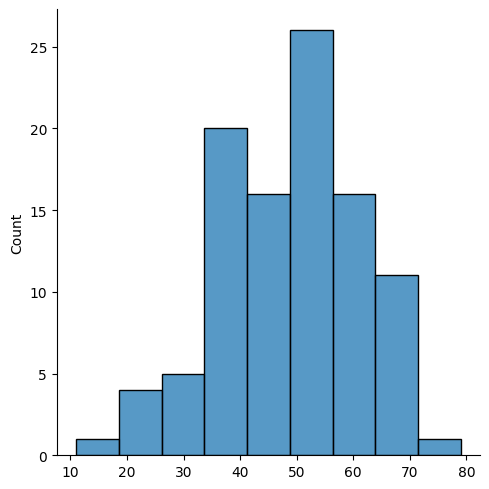

In [52]:
sns.displot(sample);

It's a bit unclear. Let's add bins to visualize it more clearly.

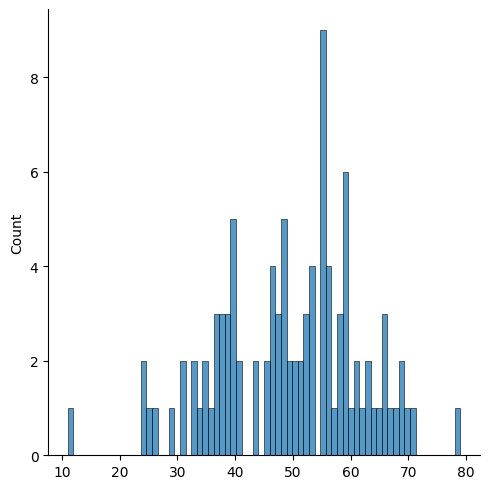

In [53]:
sns.displot(sample, bins = 70);

We can see everything above 80 is outlier. or even I think everything below 20 is also outlier.

Let's make boxplot of it.

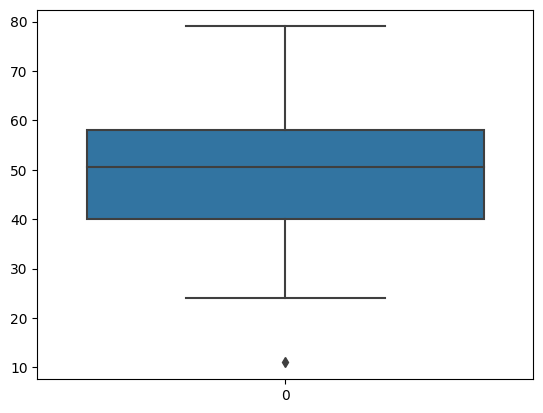

In [54]:
sns.boxplot(sample);

See it has also shown an outlier near 100. Let's calculate it.

In [55]:
ser = pd.Series(sample)

In [56]:
ser.describe()

count    100.000000
mean      49.360000
std       12.330073
min       11.000000
25%       40.000000
50%       50.500000
75%       58.000000
max       79.000000
dtype: float64

We know everything between 25% and 75% is IQR. So, we need to get the lower limit first.

In [57]:
IQR = 60.0000 - 42.0000
IQR

18.0

In [58]:
lower_limit = 42.000 - 1.5 * IQR
lower_limit

15.0

So, this is what we saw in displot that point below 20 was outliter. The value of that outlier was 15.

Now, we need to remove all points below 15 because those all are outliers. We can calculate it this way:

In [68]:
ser[ser > lower_limit]

0     24.0
1     55.0
2     53.0
3     58.0
4     63.0
      ... 
95    46.0
96    39.0
97    59.0
98    48.0
99    24.0
Length: 99, dtype: float64

This is manual way of getting rid of outliers !!!

We can also use Numpy for it.

In [69]:
np.percentile(sample, [75])

array([58.])

In [70]:
np.percentile(sample, [25])

array([40.])

In [71]:
q75, q25 = np.percentile(sample, [75, 25])

In [72]:
q75

58.0

In [74]:
q25

40.0

In [75]:
IQR = q75 - q25
IQR

18.0

In [76]:
lower_limit = q25 - 1.5 * IQR
lower_limit

13.0

In [77]:
upper_limit = q75 + 1.5 * IQR
upper_limit

85.0

See we got the same result.

### **Applying methods on Dataset:**

In [100]:
df = pd.read_csv('/content/sample_data/AmesHousing.csv')

Let's check correlation of all features.

In [79]:
df.corr()

<ipython-input-79-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Order,1.000000,0.173593,0.011797,-0.007034,0.031354,-0.048500,-0.011054,-0.052319,-0.075566,-0.030907,...,-0.011292,0.016355,0.027908,-0.024975,0.004307,0.052518,-0.006083,0.133365,-0.975993,-0.031408
PID,0.173593,1.000000,-0.001281,-0.096918,0.034868,-0.263147,0.104451,-0.343388,-0.157111,-0.229283,...,-0.051135,-0.071311,0.162519,-0.024894,-0.025735,-0.002845,-0.008260,-0.050455,0.009579,-0.246521
MS SubClass,0.011797,-0.001281,1.000000,-0.420135,-0.204613,0.039419,-0.067349,0.036579,0.043397,0.002730,...,-0.017310,-0.014823,-0.022866,-0.037956,-0.050614,-0.003434,-0.029254,0.000350,-0.017905,-0.085092
Lot Frontage,-0.007034,-0.096918,-0.420135,1.000000,0.491313,0.212042,-0.074448,0.121562,0.091712,0.222407,...,0.120084,0.163040,0.012758,0.028564,0.076666,0.173947,0.044476,0.011085,-0.007547,0.357318
Lot Area,0.031354,0.034868,-0.204613,0.491313,1.000000,0.097188,-0.034759,0.023258,0.021682,0.126830,...,0.157212,0.103760,0.021868,0.016243,0.055044,0.093775,0.069188,0.003859,-0.023085,0.266549
Overall Qual,-0.048500,-0.263147,0.039419,0.212042,0.097188,1.000000,-0.094812,0.597027,0.569609,0.429418,...,0.255663,0.298412,-0.140332,0.018240,0.041615,0.030399,0.005179,0.031103,-0.020719,0.799262
Overall Cond,-0.011054,0.104451,-0.067349,-0.074448,-0.034759,-0.094812,1.000000,-0.368773,0.047680,-0.135340,...,0.020344,-0.068934,0.071459,0.043852,0.044055,-0.016787,0.034056,-0.007295,0.031207,-0.101697
Year Built,-0.052319,-0.343388,0.036579,0.121562,0.023258,0.597027,-0.368773,1.000000,0.612095,0.313292,...,0.228964,0.198365,-0.374364,0.015803,-0.041436,0.002213,-0.011011,0.014577,-0.013197,0.558426
Year Remod/Add,-0.075566,-0.157111,0.043397,0.091712,0.021682,0.569609,0.047680,0.612095,1.000000,0.196928,...,0.217857,0.241748,-0.220383,0.037412,-0.046888,-0.011410,-0.003132,0.018048,0.032652,0.532974
Mas Vnr Area,-0.030907,-0.229283,0.002730,0.222407,0.126830,0.429418,-0.135340,0.313292,0.196928,1.000000,...,0.165467,0.143748,-0.110787,0.013778,0.065643,0.004617,0.044934,-0.000276,-0.017715,0.508285


Ugh, its too much mess. 

Our target label is 'SalePrice'. So, we should see correlation of that only.

In [80]:
df.corr()['SalePrice']

<ipython-input-80-5ff461099641>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['SalePrice']


Order             -0.031408
PID               -0.246521
MS SubClass       -0.085092
Lot Frontage       0.357318
Lot Area           0.266549
Overall Qual       0.799262
Overall Cond      -0.101697
Year Built         0.558426
Year Remod/Add     0.532974
Mas Vnr Area       0.508285
BsmtFin SF 1       0.432914
BsmtFin SF 2       0.005891
Bsmt Unf SF        0.182855
Total Bsmt SF      0.632280
1st Flr SF         0.621676
2nd Flr SF         0.269373
Low Qual Fin SF   -0.037660
Gr Liv Area        0.706780
Bsmt Full Bath     0.276050
Bsmt Half Bath    -0.035835
Full Bath          0.545604
Half Bath          0.285056
Bedroom AbvGr      0.143913
Kitchen AbvGr     -0.119814
TotRms AbvGrd      0.495474
Fireplaces         0.474558
Garage Yr Blt      0.526965
Garage Cars        0.647877
Garage Area        0.640401
Wood Deck SF       0.327143
Open Porch SF      0.312951
Enclosed Porch    -0.128787
3Ssn Porch         0.032225
Screen Porch       0.112151
Pool Area          0.068403
Misc Val          -0

Ugh! There are alot of features. Let's just check the features which are strongly correlated to SalePrice.

In [81]:
df.corr()['SalePrice'].sort_values(ascending = False)

<ipython-input-81-b96943278a62>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['SalePrice'].sort_values(ascending = False)


SalePrice          1.000000
Overall Qual       0.799262
Gr Liv Area        0.706780
Garage Cars        0.647877
Garage Area        0.640401
Total Bsmt SF      0.632280
1st Flr SF         0.621676
Year Built         0.558426
Full Bath          0.545604
Year Remod/Add     0.532974
Garage Yr Blt      0.526965
Mas Vnr Area       0.508285
TotRms AbvGrd      0.495474
Fireplaces         0.474558
BsmtFin SF 1       0.432914
Lot Frontage       0.357318
Wood Deck SF       0.327143
Open Porch SF      0.312951
Half Bath          0.285056
Bsmt Full Bath     0.276050
2nd Flr SF         0.269373
Lot Area           0.266549
Bsmt Unf SF        0.182855
Bedroom AbvGr      0.143913
Screen Porch       0.112151
Pool Area          0.068403
Mo Sold            0.035259
3Ssn Porch         0.032225
BsmtFin SF 2       0.005891
Misc Val          -0.015691
Yr Sold           -0.030569
Order             -0.031408
Bsmt Half Bath    -0.035835
Low Qual Fin SF   -0.037660
MS SubClass       -0.085092
Overall Cond      -0

So, overall Qual is highly correlated to SalePrice target label. Means it will influence the most on getting the required target label.

So, let's remove outliers from it. For it, let's visualize it first.

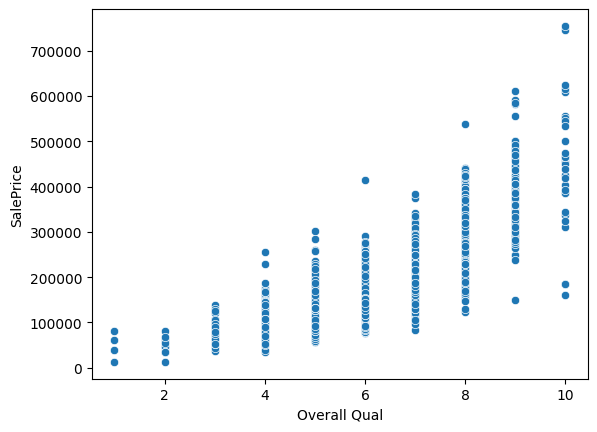

In [82]:
sns.scatterplot(x = 'Overall Qual', y = 'SalePrice', data = df);

It seems point of lower side of Qual 10 are the outlier. i.e.where the sale value is between 100000 and 200000 and quality is 10.

Let's confirm this by checking on more features. I.E. the next most correlated feature: Gr Liv Area   

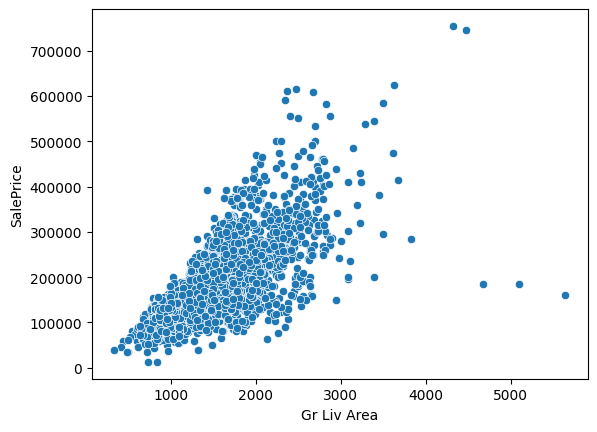

In [83]:
sns.scatterplot(x = 'Gr Liv Area',  y = 'SalePrice', data = df);

See, here its more clear that those points where saleprice is between 100000 and 200000 and Garage live area is more than 4000 seems outlier. 

Let's think is more realistically. If we see the trend on Garage Live area, we can say that more big garage area then more high sale price. What is those 3 points??? where garage area is so big like more than 4000 and sale price is so low??? It clearly shows its outlier. They will screw our assumptions and model. Its not making us able to generalize fact using our features.

So, we can say:

  **1. To check outliers, do with better with scatterplot.**
  
  **2. To remove outliers, apply conditioning and drop them.**

In [93]:
drop_outliers = df[(df['Gr Liv Area'] > 4000) & (df['SalePrice'] < 400000)]

In [89]:
drop_outliers

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,2182,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [94]:
df.drop(drop_outliers.index, inplace=True)

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

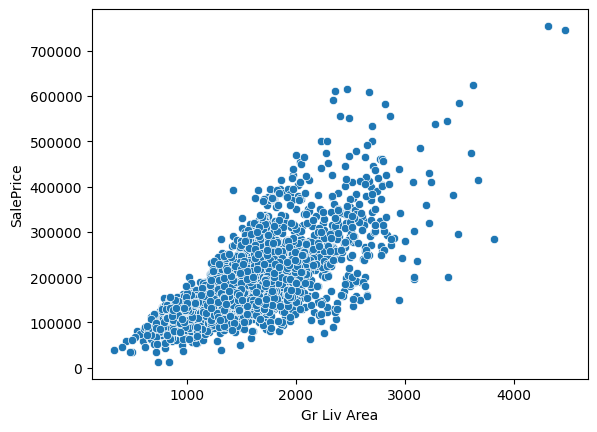

In [96]:
sns.scatterplot(x = 'Gr Liv Area',  y = 'SalePrice', data = df);

See the outliers are gone from Gr live Area.

Let's remove it from Overal Qual too.

In [101]:
drop_qual_outliers = df[(df['Overall Qual'] > 8) & (df['SalePrice'] < 200000)]
drop_qual_outliers

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,1183,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,2182,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [102]:
df.drop(drop_qual_outliers.index, inplace = True)

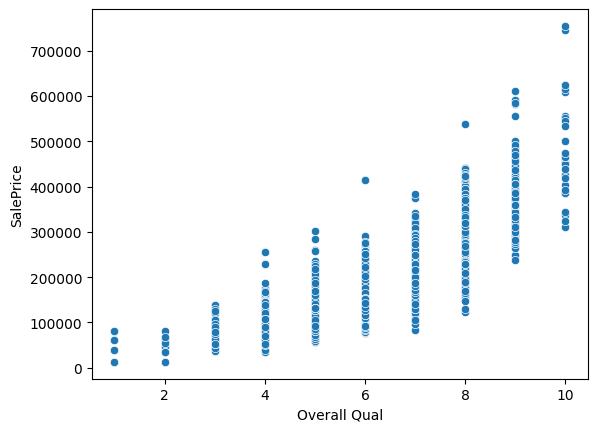

In [103]:
sns.scatterplot(x = 'Overall Qual', y = 'SalePrice', data = df);

Great! Al the outliers gone!

Don't forget to this outlier-removed file.

In [104]:
df.to_csv('/content/sample_data/Ames_without_outliers.csv')